In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.date_range('1/1/2019', periods=5)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.date_range('1/1/2019', periods=5, freq="M") # month end frequency

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31'],
              dtype='datetime64[ns]', freq='M')

In [4]:
pd.date_range('1/1/2019', periods=5, freq="W") # weekly frequency

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [5]:
pd.date_range('1/1/2019', periods=5, freq="BQS")  # business quarter start frequency

DatetimeIndex(['2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01',
               '2020-01-01'],
              dtype='datetime64[ns]', freq='BQS-JAN')

# Umbrella Sales Example

In [6]:
sales =[125,153,106,88,118,
        161,133,102,138,144,
        113,80,109,137,125,
        109,130,165,128,96]

In [7]:
t = pd.date_range('1/1/2010', freq='QS', periods=20)
t

DatetimeIndex(['2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01',
               '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01',
               '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01',
               '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01',
               '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [8]:
ts = pd.Series(sales, index=t)
ts

2010-01-01    125
2010-04-01    153
2010-07-01    106
2010-10-01     88
2011-01-01    118
2011-04-01    161
2011-07-01    133
2011-10-01    102
2012-01-01    138
2012-04-01    144
2012-07-01    113
2012-10-01     80
2013-01-01    109
2013-04-01    137
2013-07-01    125
2013-10-01    109
2014-01-01    130
2014-04-01    165
2014-07-01    128
2014-10-01     96
Freq: QS-JAN, dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sundooedu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


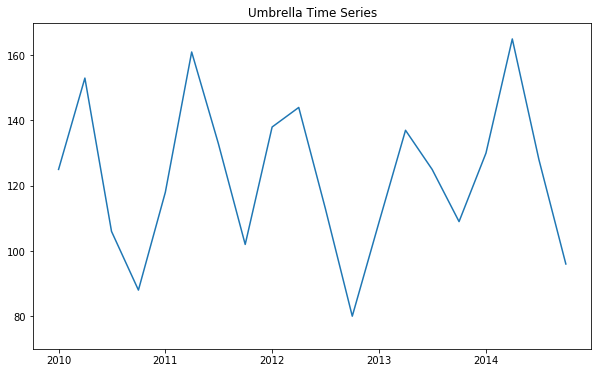

In [10]:
plt.figure(figsize=(10,6))
plt.title('Umbrella Time Series')
plt.plot(ts)
plt.ylim(70,170)
plt.show()    

# RNN forecast

# Scaling (MinMaxScaler)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(ts.values.reshape(-1,1))

# Split x and y (with appropriate time steps)

In [12]:
x_list = []
y_list = []
for i in range(20-3):
    x_list.append(ts[i:i+3,0])
    y_list.append(ts[i+3,0])
x = np.array(x_list)
y = np.array(y_list)    

# Reshape an input to 3D with the format of [samples, time steps and features]

In [13]:
x = x.reshape(17,3,1)

# Building the RNN LSTM model using sequential model

In [14]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(LSTM(50, input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(x, 
                    y, 
                    epochs = 20,
                    verbose=0)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [16]:
test_data = np.array([165,128,96])
test_data = scaler.fit_transform(test_data.reshape(-1,1))
test_data = test_data.reshape(1,3,1)
scaler.inverse_transform(model.predict(test_data))

array([[115.87683]], dtype=float32)

# Television Set Sales Example

In [17]:
tv=[4.8,4.1,6,6.5,
    5.8,5.2,6.8,7.4,
    6,5.6,7.5,7.8,
    6.3,5.9,8,8.4]

In [18]:
tvd = pd.date_range('1/1/2010', freq='Q', periods=16)
tvd

DatetimeIndex(['2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
               '2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [19]:
tvs = pd.Series(tv, index=tvd)
tvs

2010-03-31    4.8
2010-06-30    4.1
2010-09-30    6.0
2010-12-31    6.5
2011-03-31    5.8
2011-06-30    5.2
2011-09-30    6.8
2011-12-31    7.4
2012-03-31    6.0
2012-06-30    5.6
2012-09-30    7.5
2012-12-31    7.8
2013-03-31    6.3
2013-06-30    5.9
2013-09-30    8.0
2013-12-31    8.4
Freq: Q-DEC, dtype: float64

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

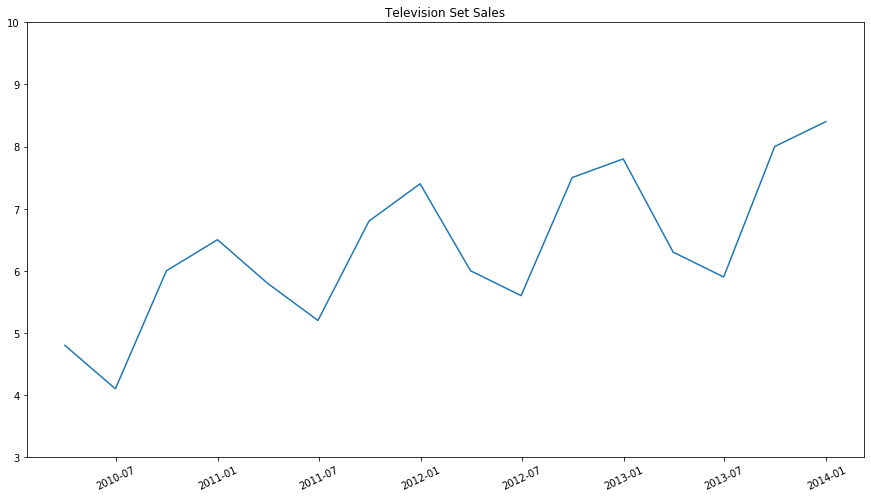

In [21]:
plt.figure(figsize=(15,8))
plt.title('Television Set Sales')
plt.plot(tvs)
plt.ylim(3,10)
plt.xticks(rotation=25)
plt.show()

In [22]:
def forecast(tvs):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    ts = scaler.fit_transform(tvs.values.reshape(-1,1))
    
    x_list = []
    y_list = []
    for i in range(len(ts)-3):
        x_list.append(ts[i:i+3,0])
        y_list.append(ts[i+3,0])
    x = np.array(x_list)
    y = np.array(y_list)
    
    x = x.reshape(len(tvs)-3,3,1)
    
    from keras.models import Sequential
    from keras.layers import Dense, LSTM, Dropout
    
    model = Sequential()
    model.add(LSTM(50, 
                   input_shape=(3,1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(x, 
                        y, 
                        epochs = 20,
                        verbose=0)
    test_data = np.array([tvs[-3],tvs[-2],tvs[-1]])
    test_data = scaler.fit_transform(test_data.reshape(-1,1))
    test_data = test_data.reshape(1,3,1)
    return scaler.inverse_transform(model.predict(test_data))

In [23]:
forecast(tvs)

array([[6.1933336]], dtype=float32)

# Lawn-Maintenance Expense 

In [24]:
lawn = pd.read_excel('../data/lawn_maintenance.xls')
lawn

,Month,2011,2012,2013
0,1,170,180,195
1,2,180,205,210
2,3,205,215,230
3,4,230,245,280
4,5,240,265,290
5,6,315,330,390
6,7,360,400,420
7,8,290,335,330
8,9,240,260,290
9,10,240,270,295


In [25]:
lawn_l=pd.concat([lawn[2011],lawn[2012],lawn[2013]],axis=0,ignore_index=True)
lawn_l

0     170
1     180
2     205
3     230
4     240
5     315
6     360
7     290
8     240
9     240
10    230
11    195
12    180
13    205
14    215
15    245
16    265
17    330
18    400
19    335
20    260
21    270
22    255
23    220
24    195
25    210
26    230
27    280
28    290
29    390
30    420
31    330
32    290
33    295
34    280
35    250
dtype: int64

In [26]:
tl = pd.date_range('1/1/2011', freq='M', periods=36)
tl

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', freq='M')

In [27]:
tls = pd.Series(lawn_l.values, index=tl)
tls

2011-01-31    170
2011-02-28    180
2011-03-31    205
2011-04-30    230
2011-05-31    240
2011-06-30    315
2011-07-31    360
2011-08-31    290
2011-09-30    240
2011-10-31    240
2011-11-30    230
2011-12-31    195
2012-01-31    180
2012-02-29    205
2012-03-31    215
2012-04-30    245
2012-05-31    265
2012-06-30    330
2012-07-31    400
2012-08-31    335
2012-09-30    260
2012-10-31    270
2012-11-30    255
2012-12-31    220
2013-01-31    195
2013-02-28    210
2013-03-31    230
2013-04-30    280
2013-05-31    290
2013-06-30    390
2013-07-31    420
2013-08-31    330
2013-09-30    290
2013-10-31    295
2013-11-30    280
2013-12-31    250
Freq: M, dtype: int64

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

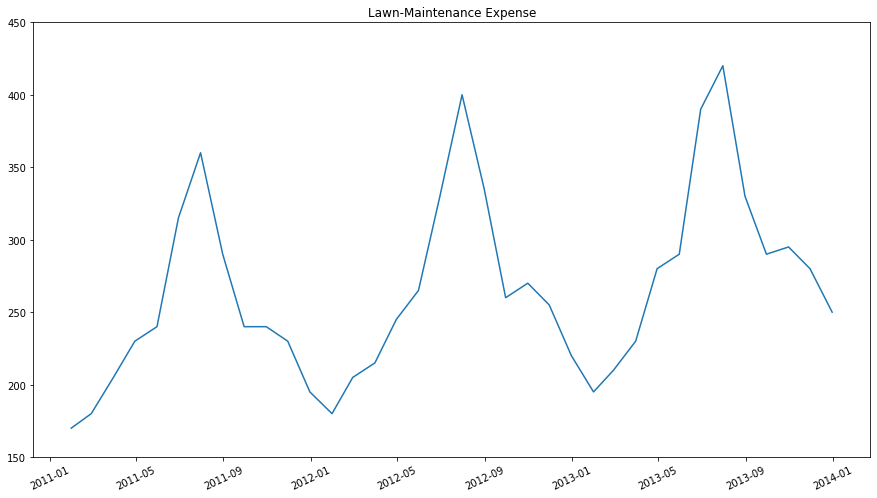

In [29]:
plt.figure(figsize=(12,6))
plt.title('Lawn-Maintenance Expense')
plt.plot(tls)
plt.ylim(150,450)
plt.xticks(rotation=25)
plt.show()

In [30]:
def forecast_lawn(tvs):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    ts = scaler.fit_transform(tvs.values.reshape(-1,1))
    
    x_list = []
    y_list = []
    for i in range(len(ts)-3):
        x_list.append(ts[i:i+3,0])
        y_list.append(ts[i+3,0])
    x = np.array(x_list)
    y = np.array(y_list)
    
    x = x.reshape(len(tvs)-3,3,1)
    
    from keras.models import Sequential
    from keras.layers import Dense, LSTM, Dropout
    
    model = Sequential()
    model.add(LSTM(50, 
                   input_shape=(3,1),
                   return_sequences=True))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(x, 
                        y, 
                        epochs = 200,
                        verbose=0)
    test_data = np.array([tvs[-3],tvs[-2],tvs[-1]])
    test_data = scaler.fit_transform(test_data.reshape(-1,1))
    test_data = test_data.reshape(1,3,1)
    return scaler.inverse_transform(model.predict(test_data))

In [31]:
forecast(tls)

array([[273.43347]], dtype=float32)

# Bicycle - Linear Trend Regression Example

In [32]:
bicycle = pd.read_excel('../data/bicycle.xls')
bicycle

,Year,Sales
0,1,21.6
1,2,22.9
2,3,25.5
3,4,21.9
4,5,23.9
5,6,27.5
6,7,31.5
7,8,29.7
8,9,28.6
9,10,31.4


In [33]:
ts = pd.Series(bicycle['Sales'].values, index = np.arange(1,11))
ts

1     21.6
2     22.9
3     25.5
4     21.9
5     23.9
6     27.5
7     31.5
8     29.7
9     28.6
10    31.4
dtype: float64

(0, 40)

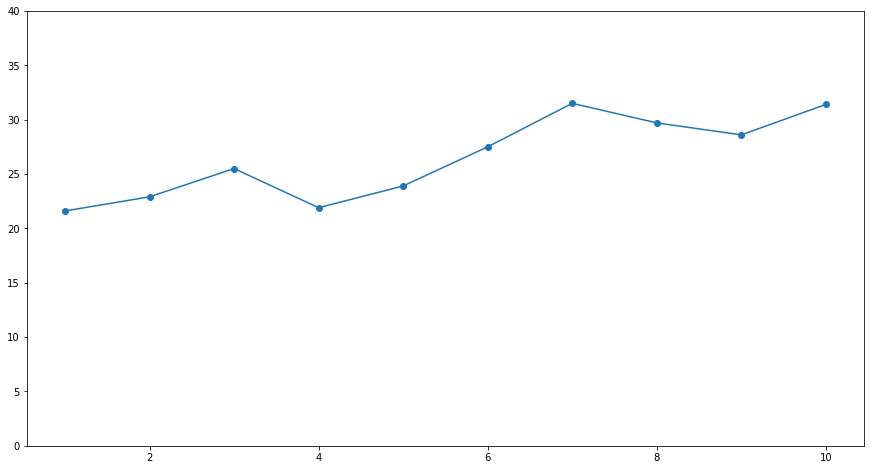

In [34]:
plt.figure(figsize=(12,6))
plt.plot(ts, marker='o')
plt.ylim(0,40)

# regression

In [35]:
import statsmodels.api as sm

In [36]:
y = ts.values
x = np.arange(1,11)
x = sm.add_constant(x)

In [37]:
lmfit = sm.OLS(y,x).fit()
lmfit.summary() # 예측식 ts = 1.1*t + 20.4

C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     26.01
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           0.000930
Time:                        09:34:55   Log-Likelihood:                -19.798
No. Observations:                  10   AIC:                             43.60
Df Residuals:                       8   BIC:                             44.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4000      1.338     15.244      0.000      17.314      23.486
x1             1.1000      0.216      5.100      0.001       0.603       1.597
==============================================================================
Omnibus:                        0.173   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.126
Skew:                           0.151   Prob(JB):                        0.939
Kurtosis:                       2.539   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
y11 = 1.1*11 + 20.4 # lmfit.params[1]*11 + lmfit.params[0]
y12 = 1.1*12 + 20.4
print(f'y11: {y11}\ny12: {y12}')

y11: 32.5
y12: 33.6


In [39]:
test_data = np.array([11,12]).reshape(-1,1)
test_data = sm.add_constant(test_data)
lmfit.predict(test_data)

array([32.5, 33.6])

In [40]:
y_pred = lmfit.predict(x)
y_pred

array([21.5, 22.6, 23.7, 24.8, 25.9, 27. , 28.1, 29.2, 30.3, 31.4])

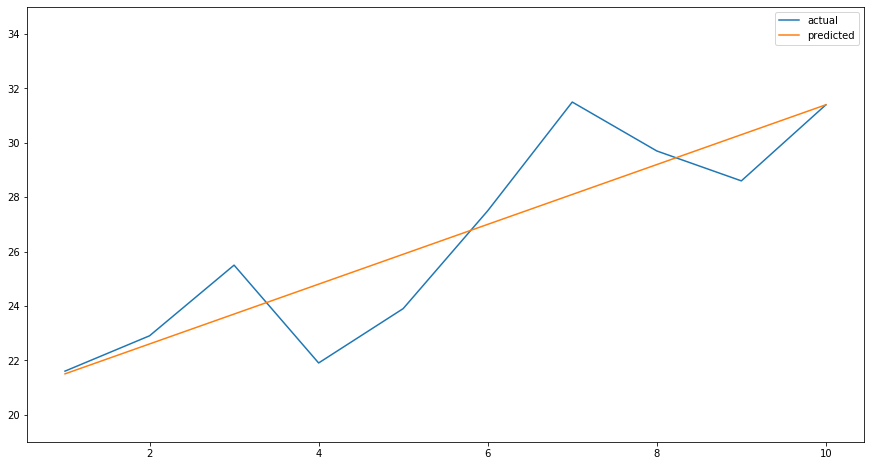

In [41]:
plt.figure(figsize=(15,8))
plt.plot(ts, label='actual')
plt.plot(np.arange(1,11), y_pred, label='predicted')
plt.ylim(19,35)
plt.legend(loc='best')

# Error calculation

In [42]:
error = y - y_pred 

In [43]:
abs_error = np.abs(error)

In [44]:
pct_error = abs_error / y

In [45]:
sq_error = np.square(error)

In [46]:
error_table = pd.DataFrame({'error':error,
                            'abs error':abs_error,
                            'pct error':pct_error,
                            'sq error':sq_error})
error_table

,error,abs error,pct error,sq error
0,1.000000e-01,1.000000e-01,4.629630e-03,1.000000e-02
1,3.000000e-01,3.000000e-01,1.310044e-02,9.000000e-02
2,1.800000e+00,1.800000e+00,7.058824e-02,3.240000e+00
3,-2.900000e+00,2.900000e+00,1.324201e-01,8.410000e+00
4,-2.000000e+00,2.000000e+00,8.368201e-02,4.000000e+00
5,5.000000e-01,5.000000e-01,1.818182e-02,2.500000e-01
6,3.400000e+00,3.400000e+00,1.079365e-01,1.156000e+01
7,5.000000e-01,5.000000e-01,1.683502e-02,2.500000e-01
8,-1.700000e+00,1.700000e+00,5.944056e-02,2.890000e+00
9,-7.105427e-15,7.105427e-15,2.262875e-16,5.048710e-29


In [47]:
me = np.mean(error)
mae = np.mean(abs_error)
mape = np.mean(pct_error)
mse = np.mean(sq_error)

In [48]:
print(f'me: {me}\nmae: {mae}\nmape: {mape}\nmse: {mse}')

me: 2.1316282072803005e-15
mae: 1.3200000000000025
mape: 0.05068143036912751
mse: 3.069999999999999


In [49]:
e_sum = np.cumsum(error)
ae_sum = np.cumsum(abs_error)
mad = ae_sum/np.arange(1,11)
ts = e_sum / mad

In [50]:
print(f'e_sum: \n{e_sum}\nae_sum: \n{ae_sum}\nmad: \n{mad}\nts: \n{ts}')

e_sum: 
[ 1.00000000e-01  4.00000000e-01  2.20000000e+00 -7.00000000e-01
 -2.70000000e+00 -2.20000000e+00  1.20000000e+00  1.70000000e+00
  2.84217094e-14  2.13162821e-14]
ae_sum: 
[ 0.1  0.4  2.2  5.1  7.1  7.6 11.  11.5 13.2 13.2]
mad: 
[0.1        0.2        0.73333333 1.275      1.42       1.26666667
 1.57142857 1.4375     1.46666667 1.32      ]
ts: 
[ 1.00000000e+00  2.00000000e+00  3.00000000e+00 -5.49019608e-01
 -1.90140845e+00 -1.73684211e+00  7.63636364e-01  1.18260870e+00
  1.93784382e-14  1.61486985e-14]


In [51]:
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

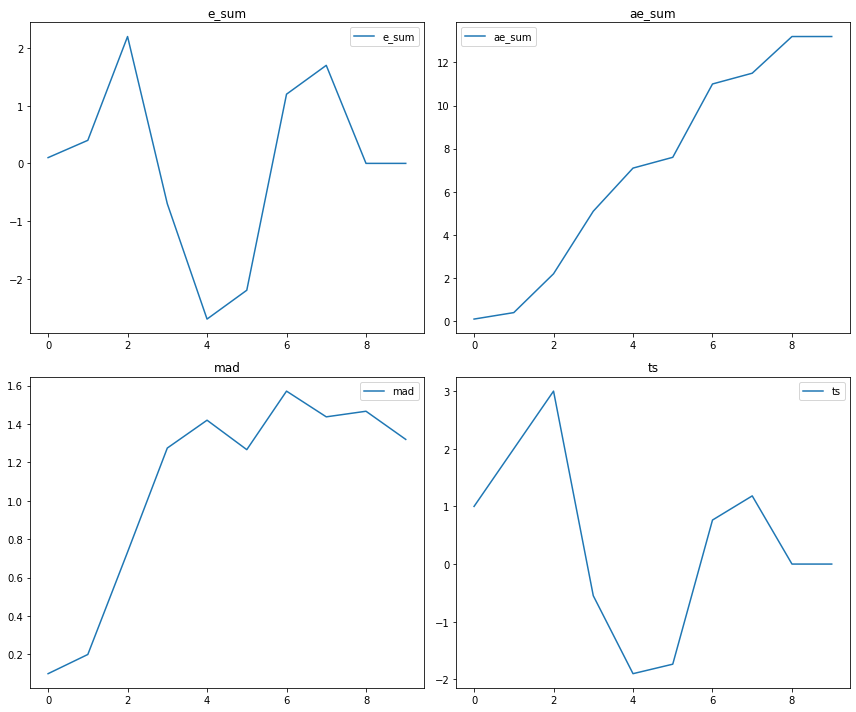

In [52]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
ax=ax.ravel()
graph = [e_sum, ae_sum, mad, ts]
name = ['e_sum','ae_sum','mad','ts']
for i in range(4):
    ax[i].set_title(name[i])
    ax[i].plot(graph[i],label=name[i])
    ax[i].legend(loc='best')
plt.tight_layout()

In [53]:
def error_cal(y, y_pred):
    error = y - y_pred 
    abs_error = np.abs(error)
    pct_error = abs_error / y
    sq_error = np.square(error)
    
    me = np.mean(error)
    mae = np.mean(abs_error)
    mape = np.mean(pct_error)
    mse = np.mean(sq_error)
    
    e_sum = np.cumsum(error)
    ae_sum = np.cumsum(abs_error)
    mad = ae_sum/np.arange(1,len(y)+1)
    ts = e_sum / mad
    return me, mae, mape, mse, ts

In [54]:
me, mae, mape, mse, ts = error_cal(y, y_pred)

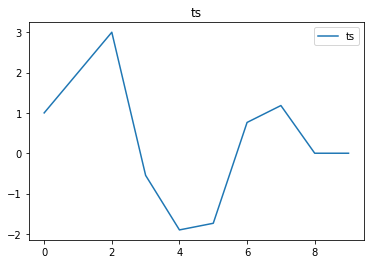

In [55]:
plt.title('ts')
plt.plot(ts,label='ts')
plt.legend(loc='best')

# Forecasting Using RNN

# Load Data

In [56]:
bicycle = pd.read_excel('../data/bicycle.xls')
bicycle

,Year,Sales
0,1,21.6
1,2,22.9
2,3,25.5
3,4,21.9
4,5,23.9
5,6,27.5
6,7,31.5
7,8,29.7
8,9,28.6
9,10,31.4


In [57]:
ts = pd.Series(bicycle['Sales'].values, index = np.arange(1,11))
ts

1     21.6
2     22.9
3     25.5
4     21.9
5     23.9
6     27.5
7     31.5
8     29.7
9     28.6
10    31.4
dtype: float64

# Scaling (MinMaxScaler)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(ts.values.reshape(-1,1))

# Split x and y (with appropriate time steps)

In [59]:
x_list = []
y_list = []
for i in range(len(ts)-3):
    x_list.append(ts[i:i+3,0])
    y_list.append(ts[i+3,0])
x = np.array(x_list)
y = np.array(y_list)

# Reshape an input to 3D with the format of [samples, time steps and features]

In [60]:
x = x.reshape(len(ts)-3,3,1)

# Building the RNN LSTM model using sequential model

In [61]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [62]:
model = Sequential()

model.add(LSTM(50, 
               input_shape=(3,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(x, 
          y, 
          epochs = 200,
          verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 183ms/step - loss: 0.5793
Epoch 2/200
7/7 [==============================] - 0s 711us/step - loss: 0.5570
Epoch 3/200
7/7 [==============================] - 0s 570us/step - loss: 0.5354
Epoch 4/200
7/7 [==============================] - 0s 712us/step - loss: 0.5143
Epoch 5/200
7/7 [==============================] - 0s 566us/step - loss: 0.4938
Epoch 6/200
7/7 [==============================] - 0s 713us/step - loss: 0.4739
Epoch 7/200
7/7 [==============================] - 0s 712us/step - loss: 0.4545
Epoch 8/200
7/7 [==============================] - 0s 570us/step - loss: 0.4357
Epoch 9/200
7/7 [==============================] - 0s 570us/step - loss: 0.4174
Epoch 10/200
7/7 [==============================] - 0s 565us/step - loss: 0.3996
Epoch 11/200
7/7 [==============================] - 0s 711us/step - loss: 0.3823
Epoch 12/200
7/7 [==============================] - 0s 570us/step - loss: 0.3655
Epoch 13/200
7/7 [===================

Epoch 103/200
7/7 [==============================] - 0s 570us/step - loss: 0.0769
Epoch 104/200
7/7 [==============================] - 0s 428us/step - loss: 0.0769
Epoch 105/200
7/7 [==============================] - 0s 570us/step - loss: 0.0769
Epoch 106/200
7/7 [==============================] - 0s 427us/step - loss: 0.0768
Epoch 107/200
7/7 [==============================] - 0s 570us/step - loss: 0.0768
Epoch 108/200
7/7 [==============================] - 0s 570us/step - loss: 0.0768
Epoch 109/200
7/7 [==============================] - 0s 570us/step - loss: 0.0768
Epoch 110/200
7/7 [==============================] - 0s 570us/step - loss: 0.0768
Epoch 111/200
7/7 [==============================] - 0s 427us/step - loss: 0.0768
Epoch 112/200
7/7 [==============================] - 0s 570us/step - loss: 0.0767
Epoch 113/200
7/7 [==============================] - 0s 570us/step - loss: 0.0767
Epoch 114/200
7/7 [==============================] - 0s 569us/step - loss: 0.0767
Epoch 115/200
7/

In [63]:
y_pred_inverse = scaler.fit_transform(model.predict(x))
y_inverse = scaler.inverse_transform(y.reshape(-1,1))

In [64]:
me1, mae1, mape1, mse1, ts1 = error_cal(y_inverse.flatten(), 
                                        y_pred_inverse.flatten())

In [65]:
print(f'me1: {me1}\nmae1: {mae1}\nmape1: {mape1}\nmse1: {mse1}\nts1: \n{ts1}')

me1: 0.34313270477963614
mae1: 0.3994066422380687
mape1: 0.5908612402393727
mse1: 0.21806886860041216
ts1: 
[1.         2.         3.         4.         5.         5.46371824
 6.01374309]


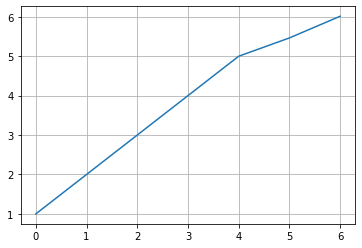

In [66]:
plt.plot(ts1)
plt.grid()

# comparison between regression and RNN

### regression is better

In [67]:
print(f'me:me1\n{me}\n{me1}\n\nmae:mae1\n{mae}\n{mae1}\n\nmape:mape1\n{mape}\n{mape1}\n\nmse:mse1\n{mse}\n{mse1}\n\nts:ts1\n{ts}\n{ts1}')

me:me1
2.1316282072803005e-15
0.34313270477963614

mae:mae1
1.3200000000000025
0.3994066422380687

mape:mape1
0.05068143036912751
0.5908612402393727

mse:mse1
3.069999999999999
0.21806886860041216

ts:ts1
[[0.        ]
 [0.13131313]
 [0.39393939]
 [0.03030303]
 [0.23232323]
 [0.5959596 ]
 [1.        ]
 [0.81818182]
 [0.70707071]
 [0.98989899]]
[1.         2.         3.         4.         5.         5.46371824
 6.01374309]


# cholesterol drug example

In [68]:
rev = np.array([23.1,21.3,27.4,34.6,33.8,
                43.2,59.5,64.4,74.2,99.3])

In [69]:
ts = pd.Series(rev)

(0, 100)

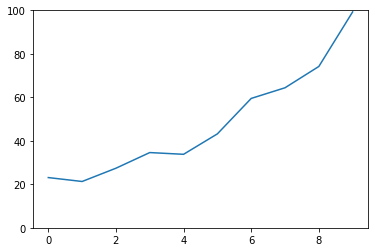

In [70]:
plt.plot(ts)
plt.ylim(0,100)
# matplotlib auto

In [71]:
t = np.arange(1,11)
t_sq = np.square(t)

In [72]:
df = pd.DataFrame({'t':t,
                   't sq':t_sq,
                   'rev':rev})
y=rev
x=df.drop('rev', axis=1)

In [73]:
import statsmodels.api as sm

In [74]:
x = sm.add_constant(x)
lmfit = sm.OLS(y,x).fit()
lmfit.summary()

C:\Users\sundooedu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\sundooedu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 30 Jan 2020   Prob (F-statistic):           9.14e-07
Time:                        09:35:03   Log-Likelihood:                -26.208
No. Observations:                  10   AIC:                             58.42
Df Residuals:                       7   BIC:                             59.32
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1817      4.676      5.171      0.001      13.124      35.239
t             -2.1060      1.953     -1.078      0.317      -6.724       2.512
t sq           0.9216      0.173      5.326      0.001       0.512       1.331
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   2.474
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.545
Skew:                           0.062   Prob(JB):                        0.761
Kurtosis:                       1.863   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lmfit.params

const    24.181667
t        -2.105985
t sq      0.921591
dtype: float64

# predict y11, y12

In [76]:
y11 = lmfit.params[0]+lmfit.params[1]*11 + lmfit.params[2]*np.square(11)
y12 = lmfit.params[0]+lmfit.params[1]*12 + lmfit.params[2]*np.square(12)
print(f'y11: {y11}\ny12: {y12}')

y11: 112.52833333333332
y12: 131.6189393939394


# Forecasting Chart

In [77]:
y_pred = lmfit.predict(x)
y_pred

0    22.997273
1    23.656061
2    26.158030
3    30.503182
4    36.691515
5    44.723030
6    54.597727
7    66.315606
8    79.876667
9    95.280909
dtype: float64

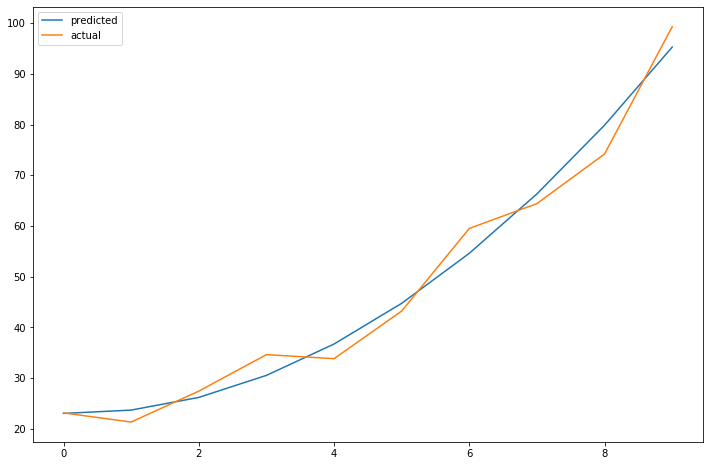

In [78]:
plt.figure(figsize=(12,8))
plt.plot(y_pred, label='predicted')
plt.plot(y, label='actual')
plt.legend(loc='best')

# error calculation

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
mean_squared_error(y, y_pred)

11.064792424242432

# forcast using RNN

# forecast using linear regression

# comparison among three methods